In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('cluster.xlsx')
data.head()

,x,y
0,12,39
1,20,39
2,28,30
3,18,52
4,29,54


In [3]:
df=data[['x','y']]
print(df.head())
print(df.shape)

    x   y
0  12  39
1  20  39
2  28  30
3  18  52
4  29  54
(19, 2)


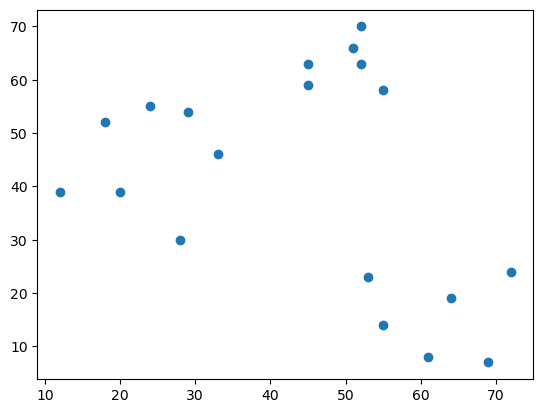

In [4]:
plt.scatter(df['x'],df['y'])

In [5]:
np.random.seed(200)
k=3

centroids={i+1: [np.random.randint(0,80), np.random.randint(0,80)] for i in range(k)}
print(centroids)

{1: [26, 16], 2: [68, 42], 3: [55, 76]}


# Starts Here

In [25]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.decomposition import PCA

In [26]:
data=pd.read_csv('Memberdata.csv')
data.head(5)

,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,41904.94792,Other Sauces
1,M09736,6468572,15669800,41904.94792,Cashews
2,M09736,6468572,34989501,41904.94792,Other Dals
3,M09736,6468572,7572303,41904.94792,Namkeen
4,M09736,6468572,15669856,41904.94792,Sugar


In [27]:
data.isna().sum()

Member         0
Order          0
SKU            0
Created On     0
Description    0
dtype: int64

In [28]:
data.dropna(inplace=True)

In [29]:
data.isna().sum()

Member         0
Order          0
SKU            0
Created On     0
Description    0
dtype: int64

In [30]:
data.columns

Index(['Member', 'Order', 'SKU', 'Created On', 'Description'], dtype='object')

In [33]:
data['Created On'] = data['Created On'].str.replace(' ', '_')

In [34]:
data.columns

Index(['Member', 'Order', 'SKU', 'Created On', 'Description'], dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data.dropna(inplace=True)
# Encode categorical variables
label_encoder = LabelEncoder()
data['Member'] = label_encoder.fit_transform(data['Member'])
data['Description'] = label_encoder.fit_transform(data['Description'])

#data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Created On'] = label_encoder.fit_transform(data['Created On'])






# cleaning data to the numerical value
print(data.head(10)['Member'])
print(data.head(10)['Description'])
print(data.head(10)['Created On'])


#print(data.head(10)['recruitment_channel'])



0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Member, dtype: int32
0    35
1    11
2    32
3    30
4    48
5     2
6    49
7    36
8    32
9    34
Name: Description, dtype: int32
0    60
1    60
2    60
3    60
4    60
5    60
6    60
7    60
8    60
9    60
Name: Created On, dtype: int32


In [42]:
data.columns

Index(['Member', 'Order', 'SKU', 'Created On', 'Description'], dtype='object')

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)
print(df_scaled)

[[ 0.         -1.6396132   1.0253682   1.64398127  0.31693029]
 [ 0.         -1.6396132  -0.27630881  1.64398127 -1.03195377]
 [ 0.         -1.6396132   1.02508266  1.64398127  0.14831979]
 ...
 [ 0.          1.03847557 -0.27640479 -0.39693549  0.71035481]
 [ 0.          1.03847557 -0.27639786 -0.39693549 -1.53778529]
 [ 0.          1.03847557 -0.27640453 -0.39693549  0.4293373 ]]


In [45]:
sns.set_style("whitegrid")
sns.set_context("poster")


In [46]:
data.columns

Index(['Member', 'Order', 'SKU', 'Created On', 'Description'], dtype='object')

C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

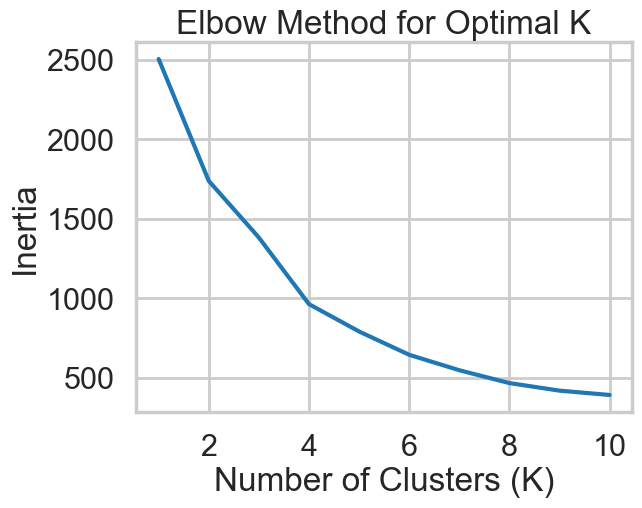

In [47]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()



In [49]:
help(kmeans.inertia_)

Help on float object:

class float(object)
 |  float(x=0, /)
 |  
 |  Convert a string or number to a floating point number, if possible.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      True if self else False
 |  
 |  __ceil__(self, /)
 |      Return the ceiling as an Integral.
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __float__(self, /)
 |      float(self)
 |  
 |  __floor__(self, /)
 |      Return the floor as an Integral.
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __format__(self, format_spec, /)
 |      Formats the float according to format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(sel

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Member       626 non-null    int32  
 1   Order        626 non-null    float64
 2   SKU          626 non-null    int64  
 3   Created On   626 non-null    int32  
 4   Description  626 non-null    float64
dtypes: float64(2), int32(2), int64(1)
memory usage: 19.7 KB


In [54]:
optimal_k = 4  # Replace with the value you found from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)
print(df['Cluster'])

C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0      1
1      1
2      1
3      1
4      1
      ..
621    2
622    0
623    0
624    2
625    0
Name: Cluster, Length: 626, dtype: int32


In [57]:
data.columns

Index(['Member', 'Order', 'SKU', 'Created On', 'Description', 'Cluster'], dtype='object')

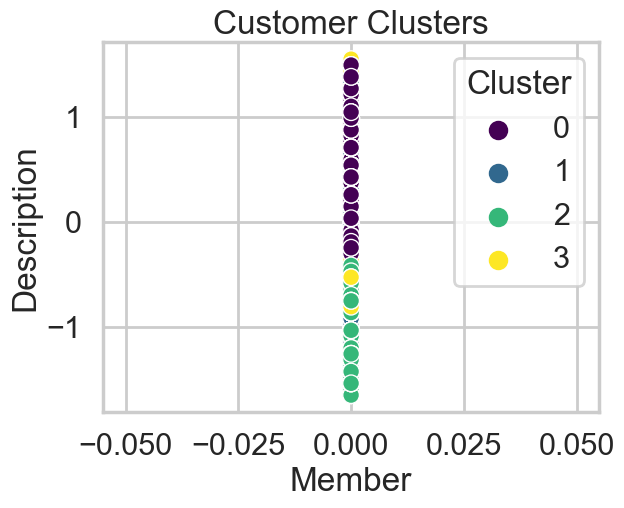

In [58]:
import seaborn as sns

# Assuming you have 'clustered_data' with the cluster labels
sns.scatterplot(data=df, x='Member', y='Description', hue='Cluster', palette='viridis')
plt.title('Customer Clusters')
plt.show()


In [59]:
cluster_means = df.groupby('Cluster').mean()
cluster_medians = df.groupby('Cluster').median()

# Display the mean and median values for each cluster
print("Mean Values for Each Cluster:")
print(cluster_means)

print("\nMedian Values for Each Cluster:")
print(cluster_medians)


Mean Values for Each Cluster:
         Member     Order           SKU  Created On  Description
Cluster                                                         
0           0.0  0.690986  1.635437e+07   24.423387     0.652112
1           0.0 -1.385620  1.826660e+07   44.922280     0.196078
2           0.0  0.559021  1.872476e+07   24.664671    -1.236911
3           0.0  0.150194  9.270685e+07   31.166667     0.388746

Median Values for Each Cluster:
         Member     Order         SKU  Created On  Description
Cluster                                                       
0           0.0  0.681527  15669777.0        26.0     0.710355
1           0.0 -1.373294  15669814.0        51.0     0.260727
2           0.0  0.737255  15668521.0        28.0    -1.312971
3           0.0  0.618618  92436826.0        30.0     0.541744


In [64]:
silhouette_avg = silhouette_score(df, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: -0.015108023203197271


In [70]:
from sklearn.metrics import silhouette_score

best_score = -1
best_k = -1

for k in range(2, 11):  # Test K from 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels)
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

print(f"Best K: {best_k} with Silhouette Score: {best_score}")


C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Best K: 6 with Silhouette Score: 0.9991511030620467


C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\punee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[0.8951510260080286, 0.869885348557195, 0.9463081684567658, 0.983983299244195, 0.9991511030620467, 0.9978518916755913, 0.9678726852768191, 0.9707920913151571, 0.9714019291519225]


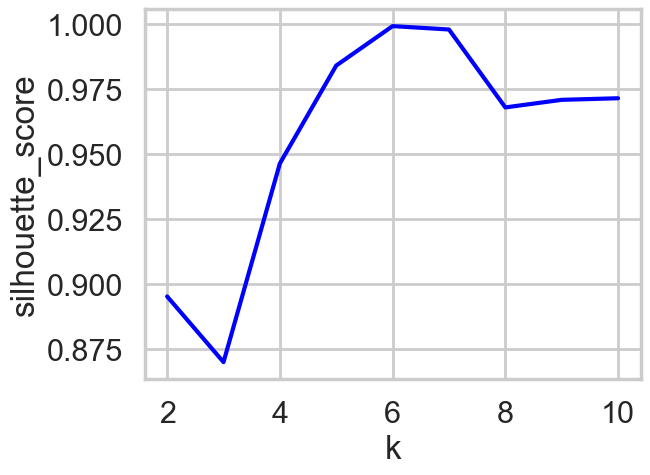

In [77]:
k=list(range(2,11))
ys=[]
for i in k:
    km=KMeans(n_clusters=i,random_state=2)
    km.fit(df)
    labels=km.labels_
    ys.append(silhouette_score(df,labels))

plt.plot(k,ys,color='b')
plt.xlabel('k')
plt.ylabel('silhouette_score')
print(ys)
